# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df = pd.read_csv("drive/MyDrive/foodhub_order.csv")
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
len(df)

1898

#### Observations:
*  There are a total of 1898 orders in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The above columns have datatype maintained by pandas such as int64, object and float64 which are 64 bit datatypes

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
bool(df.isna().any(axis=1).any())

False

#### Observations:
* This shows that on taking each row we see that there are no NaN values in them. All data is valid and nothing is missing

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
print("Max time:", df['food_preparation_time'].max())
print("Min time:", df['food_preparation_time'].min())
print("Average time:", df['food_preparation_time'].mean())

Max time: 35
Min time: 20
Average time: 27.371970495258168


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
len(df[pd.to_numeric(df['rating'], errors='coerce').isna()])

736

#### Observations:
*   We observe that 736 people have not given their rating and this indicates that they might have eaten from those restaurants for the first time or they have ordered very less from the restaurant.
*   The maximum time taken for food preparation is 35 mins and minimum time is 20 mins





### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

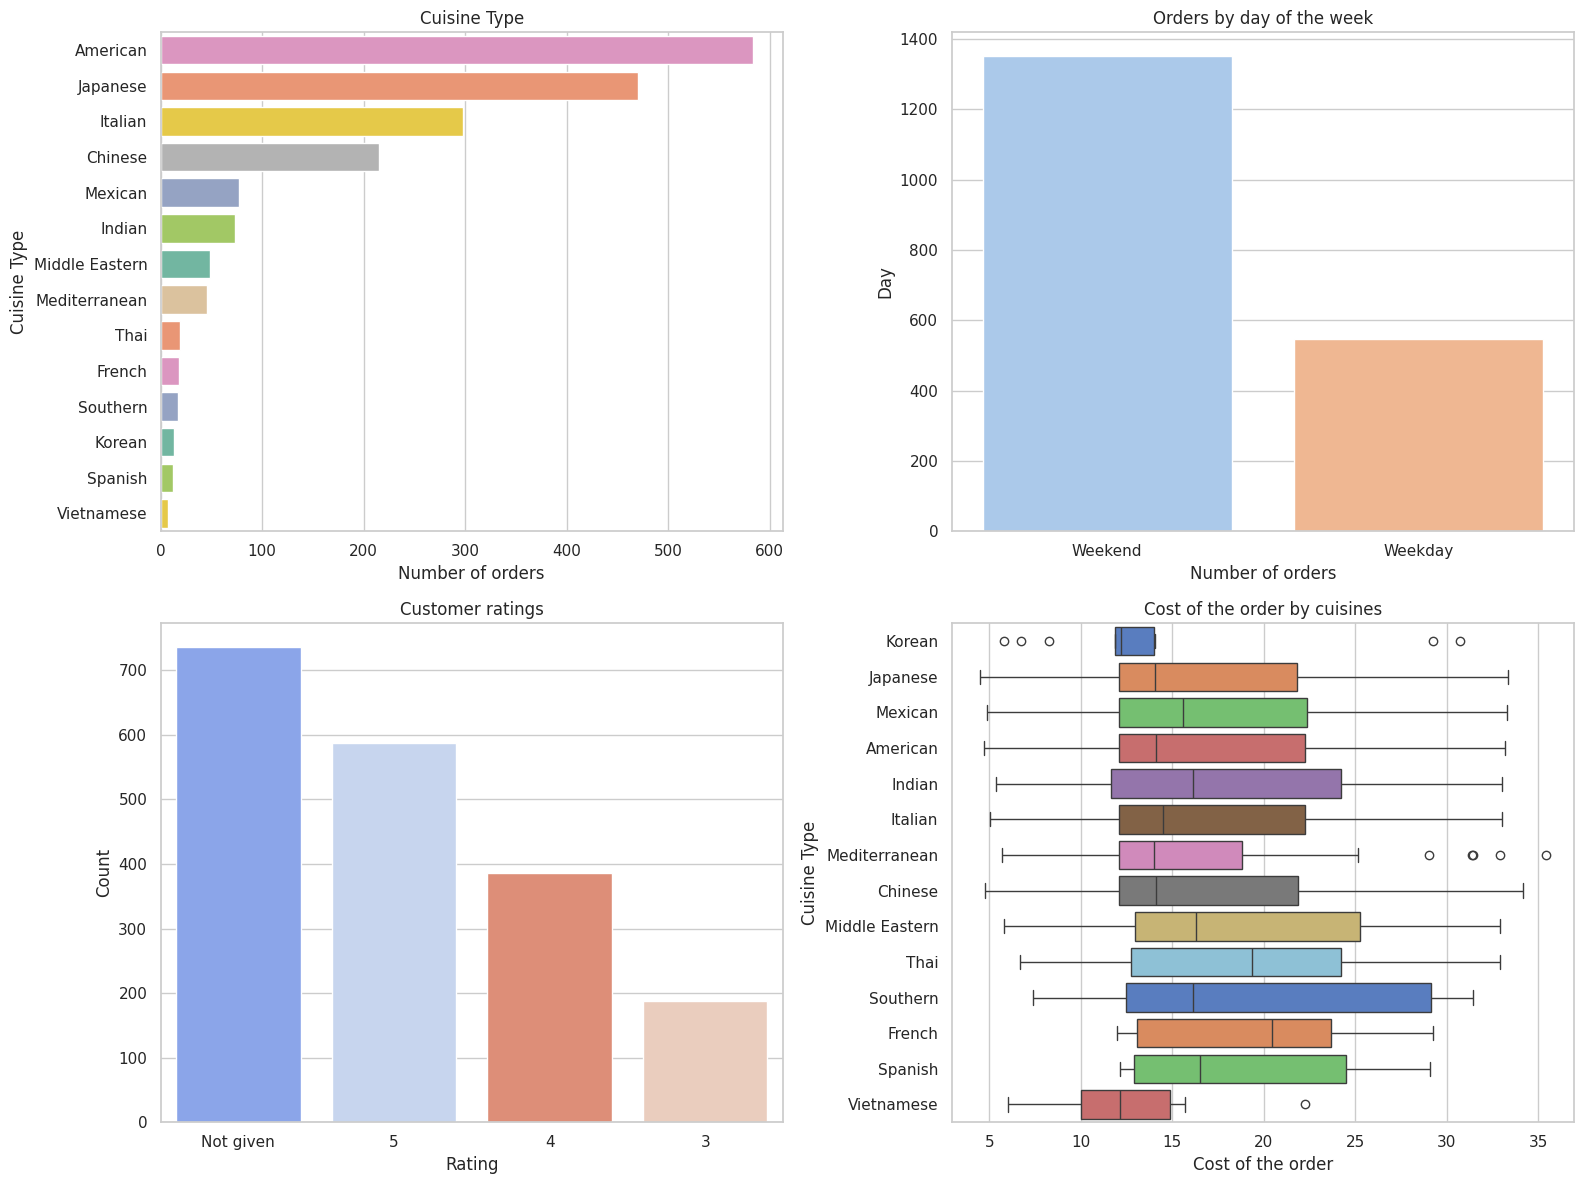

In [ ]:
# Write the code here
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index, ax=axes[0, 0], palette='Set2', hue='cuisine_type')
axes[0, 0].set_title('Cuisine Type')
axes[0, 0].set_xlabel('Number of orders')
axes[0, 0].set_ylabel('Cuisine Type')

sns.countplot(data=df, x='day_of_the_week', order=df['day_of_the_week'], ax=axes[0, 1], palette='pastel', hue='day_of_the_week')
axes[0, 1].set_title('Orders by day of the week')
axes[0, 1].set_xlabel('Number of orders')
axes[0, 1].set_ylabel('Day')

sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, ax=axes[1, 0], palette='coolwarm', hue='rating')
axes[1, 0].set_title('Customer ratings')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Count')

sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type', ax=axes[1, 1], palette='muted', hue='cuisine_type')
axes[1, 1].set_title('Cost of the order by cuisines')
axes[1, 1].set_xlabel('Cost of the order')
axes[1, 1].set_ylabel('Cuisine Type')

plt.tight_layout()
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df.groupby('restaurant_name').size().sort_values(ascending=False).reset_index(name='count')['restaurant_name'].head(5)

,restaurant_name
0,Shake Shack
1,The Meatball Shop
2,Blue Ribbon Sushi
3,Blue Ribbon Fried Chicken
4,Parm


#### Observations:
These 5 restaurants(Shake Shack, Meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm) are the ones

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df['day_of_the_week']=='Weekend'].value_counts(subset=['cuisine_type']).idxmax()[0]

'American'

#### Observations:
We see American cuisine is most popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
s=df[df['cost_of_the_order']>20]['cost_of_the_order']
float(len(s)/len(df)*100)

29.24130663856691

#### Observations:
Approx 29.2% of orders are above 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
float(df['delivery_time'].mean())

24.161749209694417

#### Observations:
The mean order delivery time is approx 29.1%

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df.groupby('customer_id').size().sort_values(ascending=False).reset_index(name='Number of orders').head(3)

,customer_id,Number of orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:
Orders placed by 52832 are 13, 47440 are 10, 83287 are 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


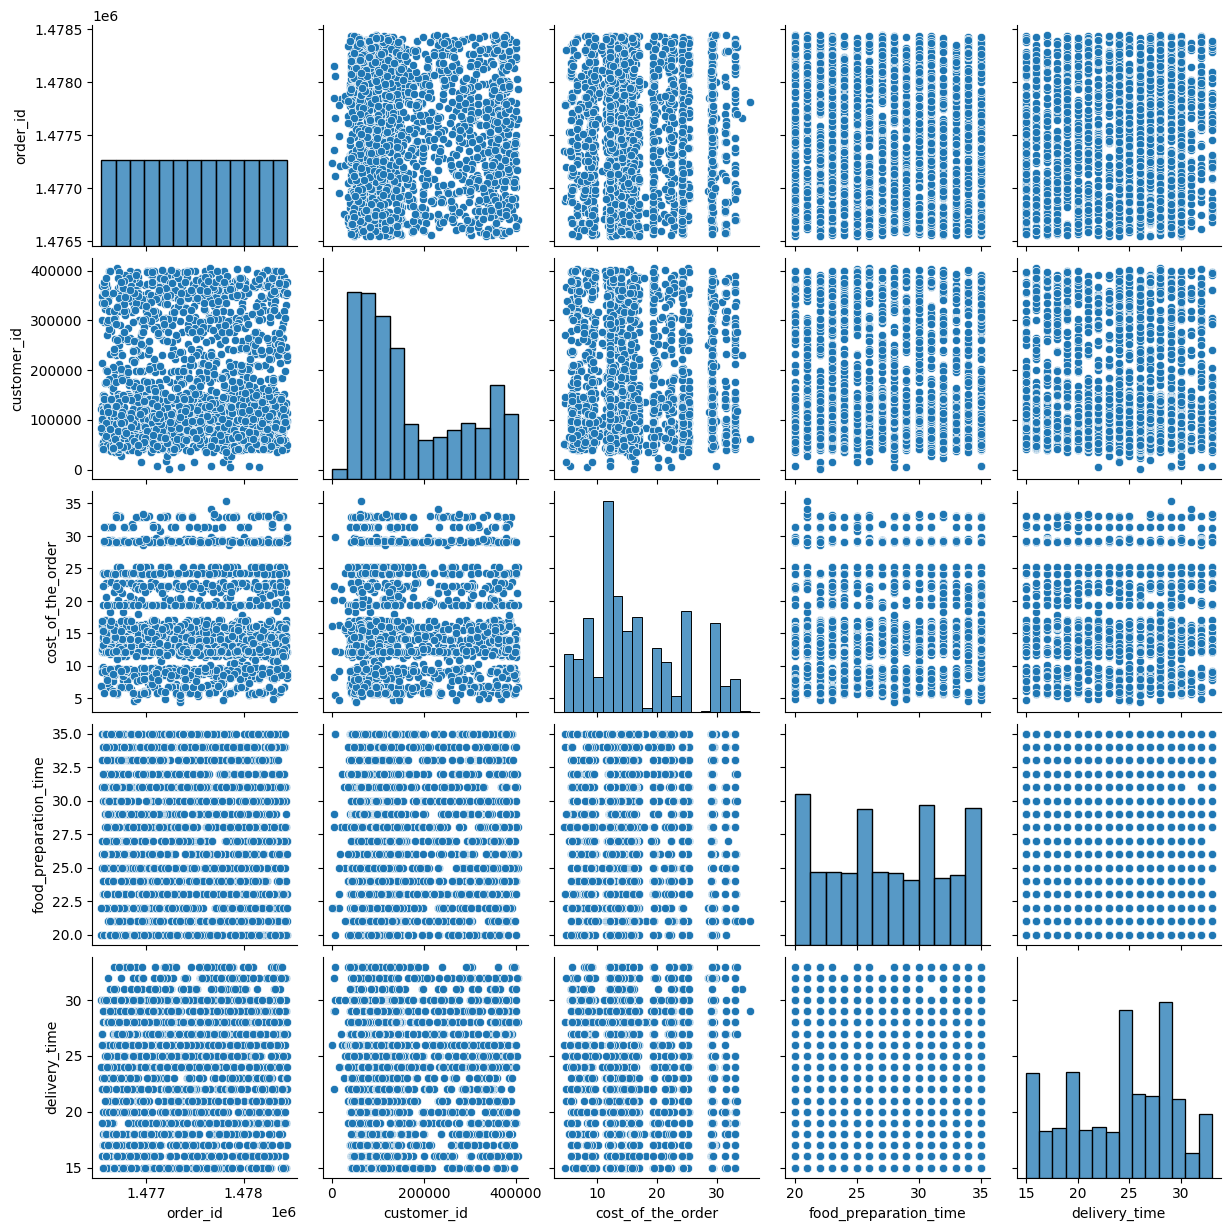

In [ ]:
# Write the code here
sns.pairplot(data=df[['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time']])

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.fillna(0, inplace=True)
rest = (df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).query('count > 50 and mean > 4').reset_index())
rest

,restaurant_name,count,mean


#### Observations:
There is no restaurant satisfying the above conditions

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
s=df.copy()

float(s.apply(lambda x: 0.25*x['cost_of_the_order'] if x['cost_of_the_order']>20 else 0.15*x['cost_of_the_order'] if x['cost_of_the_order']>5 else 0, axis=1).sum())

6166.303

#### Observations:
Total revenue earned by the company by applying the charges on all restaurants based on orders is 6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
float(len(df[df['delivery_time']>60])/len(df)*100)

0.0

#### Observations:
All orders are delivered before 60 minutes from the time of the order being placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
Delivery is relatively faster on weekends where it is 6 minutes faster on an average.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Based on the dataset, the top restaurants based on most number of orders are Shake Shack, Meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.
*  Based on rating, the top restaurants are 'wichcraft, Ravagh Persian Grill, Chola Eclectic Indian Cuisine
*  The most ordered cuisine is American which is ordered most on weekends which results in the high count, Japan is next and so on





### Recommendations:

*  So if a customer would want to look at the general trend and that is the one which has high quality food but not concerned much about other factors then they can use the topmost restaurants
*  If a customer is concerned with several factors like decent food, timely
delivery, preparation time and many more then it is recommended to look at the second list of restaurants based on rating.
*  Ordering on weekends is better as the average time is lesser than weekdays.

---